<a href="https://colab.research.google.com/github/ggfuentes78/TF_DataScience1/blob/master/ProyectoDS_ParteI_Fuentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sección nueva**

# **Data Science 1:**
## **1er Entregable del Trabajo Final**

En el presente trabajo, tomando como base los datos de ingresos de los individuos de la Encuesta Permanente de Hogares del INDEC del ultimo trimeste del 2023, se pretende determinar si existe una relacion entre el nivel de educacion alcanzado, la edad y el nivel de ingresos.
Tambien se pretende demostrar si existe o no paridad entre los ingresos percibidos por genero a igualdad de formacion y region/aglomerado urbano.
Por ultimo, se analizara como influye el lugar de residencia, la zona geografica donde habitan y trabajan los individuos, con el nivel de educacion alcanzado y la remuneracion recibida por genero.

###**Hipotesis**

* A mayor nivel educativo, mayor es el ingreso.
* Las mujeres reciben, en general, menor remuneracion que los hombres con la misma edad y el mismo nivel educativo
* Los mayores ingresos en la vidad de los individuos se dan entre lo 45 y 55 años de edad


###**Sobre el Dataset**

El Dataset surge de la Encuesta Permanente de Hogares (EPH) del INDEC del cuarto trimestre del 2023.

Recolecta datos sobre la ocupacion, los ingresos, edad, genero y nivel de educacion alcanzado por region del pais y aglomerado urbano.

Las variables categoricas del Dataset ya estan codificadas con valores numericos por lo que no es necesaria su conversion.

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

url='https://raw.githubusercontent.com/ggfuentes78/TF_DataScience1/master/EPH_ingresos.csv'
df= pd.read_csv(url, sep=',')

df.drop(columns=['year', 'quarter'], inplace=True)
label_ed_lvl=['Primaria Incompleta', 'Primaria Completa', 'Secundaria Incompleta', 'Secundaria Completa', 'Superior Universitaria Incompleta', 'Superior Universitaria Completa', 'Sin instruccion']

In [2]:
df.head()


,region,city,weighs,gender,age,work_class,hours_worked_w,tot_income,ed_lvl,med_care,read_write,CH10,CH11,h_ed_lvl,CH13,nationality,PP04A
0,44,17,281,1,34,3,36.0,450000.0,4,1,1,2,0,4,1,1,1.0
1,44,17,281,2,32,3,15.0,200000.0,4,1,1,2,0,4,1,1,2.0
2,44,93,85,1,47,2,60.0,400000.0,2,4,1,2,0,2,1,1,2.0
3,42,26,216,1,33,3,48.0,480000.0,4,1,1,2,0,4,1,1,2.0
4,42,26,115,1,46,1,98.0,120000.0,3,4,1,2,0,4,2,1,2.0


In [3]:
df.describe()

,region,city,weighs,gender,age,work_class,hours_worked_w,tot_income,ed_lvl,med_care,read_write,CH10,CH11,h_ed_lvl,CH13,nationality,PP04A
count,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,1.684600e+04,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000
mean,36.277039,23.811053,584.486644,1.454351,40.739760,2.732103,36.489493,2.510889e+05,4.099074,2.101152,1.003027,1.922652,0.098718,4.676362,1.346195,1.467292,1.780601
std,14.157684,17.782922,765.464789,0.497927,12.926532,0.510035,15.677636,2.496186e+05,1.399776,1.974633,0.054940,0.278466,0.384536,1.674198,0.478756,0.895405,0.445625
min,1.000000,2.000000,27.000000,1.000000,13.000000,1.000000,1.000000,2.000000e+03,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,40.000000,13.000000,171.000000,1.000000,30.000000,3.000000,25.000000,1.200000e+05,3.000000,1.000000,1.000000,2.000000,0.000000,4.000000,1.000000,1.000000,2.000000
50%,42.000000,23.000000,309.000000,1.000000,40.000000,3.000000,40.000000,2.000000e+05,4.000000,1.000000,1.000000,2.000000,0.000000,4.000000,1.000000,1.000000,2.000000
75%,43.000000,32.000000,607.000000,2.000000,50.000000,3.000000,48.000000,3.000000e+05,5.000000,4.000000,1.000000,2.000000,0.000000,6.000000,2.000000,2.000000,2.000000
max,44.000000,93.000000,6689.000000,2.000000,93.000000,4.000000,98.000000,9.500000e+06,7.000000,123.000000,2.000000,9.000000,9.000000,9.000000,2.000000,9.000000,3.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16846 entries, 0 to 16845
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          16846 non-null  int64  
 1   city            16846 non-null  int64  
 2   weighs          16846 non-null  int64  
 3   gender          16846 non-null  int64  
 4   age             16846 non-null  int64  
 5   work_class      16846 non-null  int64  
 6   hours_worked_w  16846 non-null  float64
 7   tot_income      16846 non-null  float64
 8   ed_lvl          16846 non-null  int64  
 9   med_care        16846 non-null  int64  
 10  read_write      16846 non-null  int64  
 11  CH10            16846 non-null  int64  
 12  CH11            16846 non-null  int64  
 13  h_ed_lvl        16846 non-null  int64  
 14  CH13            16846 non-null  int64  
 15  nationality     16846 non-null  int64  
 16  PP04A           16846 non-null  float64
dtypes: float64(3), int64(14)
memory

In [179]:
prom_ingresos=df.groupby(['ed_lvl', 'gender'])['tot_income'].mean().unstack()
print('Ingreso promedio por Nivel de educacion y genero:')
print(prom_ingresos)
print('')
moda_ingresos_por_ed_lvl = df.groupby(['ed_lvl', 'gender'])['tot_income'].apply(lambda x: x.mode())
print('Ingreso mas repetido por nivel de educacion y genero:')
print(moda_ingresos_por_ed_lvl)
print('')
max_ingresos=df.groupby(['ed_lvl', 'gender'])['tot_income'].max().unstack()
print('Maximo ingreso por nivel de educacion y genero:')
print(max_ingresos)

Ingreso promedio por Nivel de educacion y genero:
gender              1              2
ed_lvl                              
1       178162.318841  148506.044304
2       203910.099696  141085.548529
3       210540.852027  145738.979778
4       257402.960393  187408.466696
5       294118.386304  210640.783114
6       445361.441234  338295.285076
7       202500.000000  192335.000000

Ingreso mas repetido por nivel de educacion y genero:
ed_lvl  gender   
1       1       0    200000.0
        2       0    100000.0
2       1       0    200000.0
        2       0     60000.0
                1    200000.0
3       1       0    200000.0
        2       0    100000.0
4       1       0    200000.0
        2       0    200000.0
5       1       0    300000.0
        2       0    200000.0
6       1       0    300000.0
        2       0    200000.0
7       1       0     80000.0
                1    200000.0
        2       0    100000.0
                1    180000.0
Name: tot_income, dtype: float64



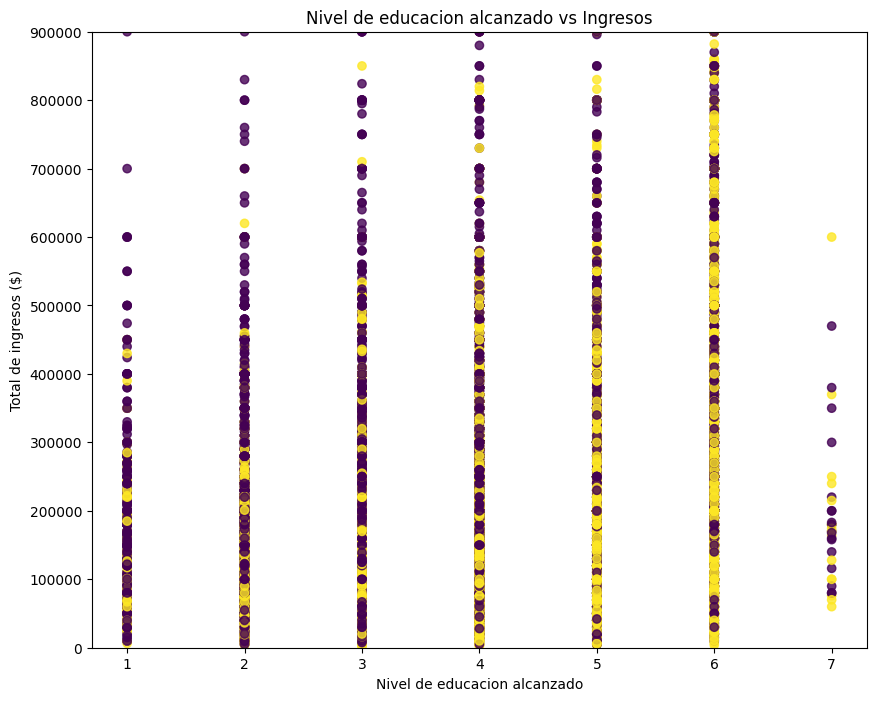

In [183]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(df.ed_lvl, df.tot_income,alpha=0.8, c=df.gender)
ax.set_title('Nivel de educacion alcanzado vs Ingresos')
ax.set_ylabel('Total de ingresos ($)')
ax.set_xlabel('Nivel de educacion alcanzado')
plt.ylim(0, 900000)
plt.show()

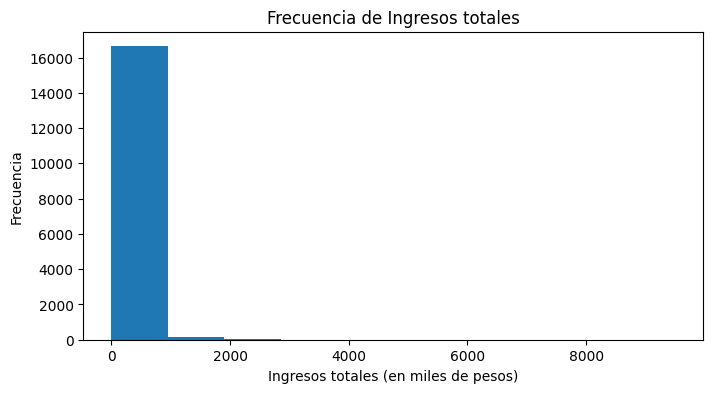

In [104]:
fig, ax= plt.subplots(figsize=(8,4))
ax.hist(df.tot_income/1000)
ax.set_ylabel('Frecuencia')
ax.set_xlabel('Ingresos totales (en miles de pesos)')
ax.set_title('Frecuencia de Ingresos totales')
plt.show()

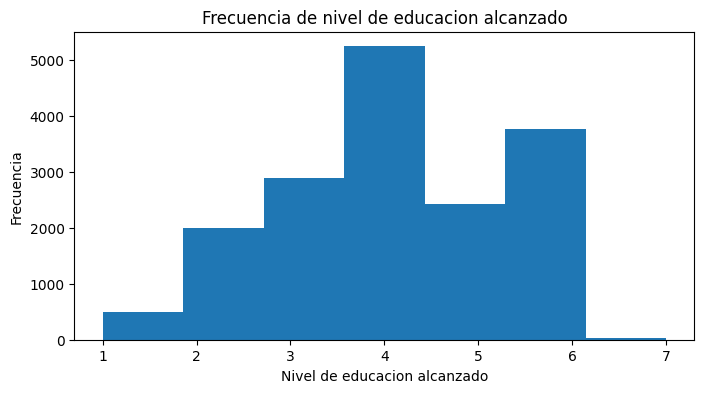

In [110]:
fig, ax= plt.subplots(figsize=(8,4))
ax.hist(df.ed_lvl, bins=7, density=False)
ax.set_ylabel('Frecuencia')
ax.set_xlabel('Nivel de educacion alcanzado')
ax.set_title('Frecuencia de nivel de educacion alcanzado')
plt.show()

Text(0.5, 1.0, 'Nivel de educacion alcanzado')

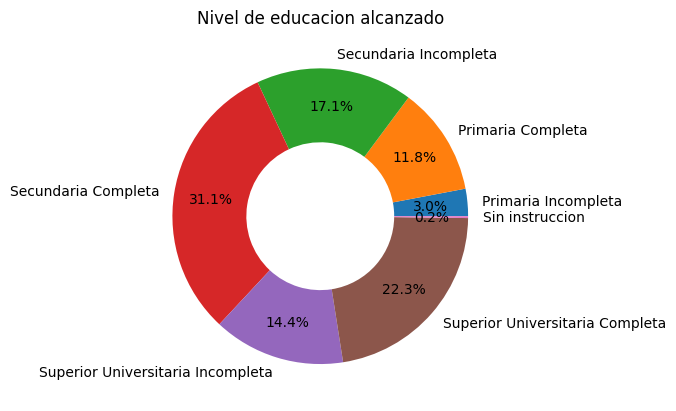

In [24]:
label_ed_lvl=['Primaria Incompleta', 'Primaria Completa', 'Secundaria Incompleta', 'Secundaria Completa', 'Superior Universitaria Incompleta', 'Superior Universitaria Completa', 'Sin instruccion']
fig, ax= plt.subplots()
cant_ed_lvl=df.ed_lvl.value_counts()
cant_ed_lvl=cant_ed_lvl.sort_index()
ax.pie(cant_ed_lvl,autopct='%1.1f%%', labels=label_ed_lvl,wedgeprops=dict(width=0.5), pctdistance=0.75)
ax.set_title('Nivel de educacion alcanzado')

Text(0.5, 1.0, 'Frecuencia por edad')

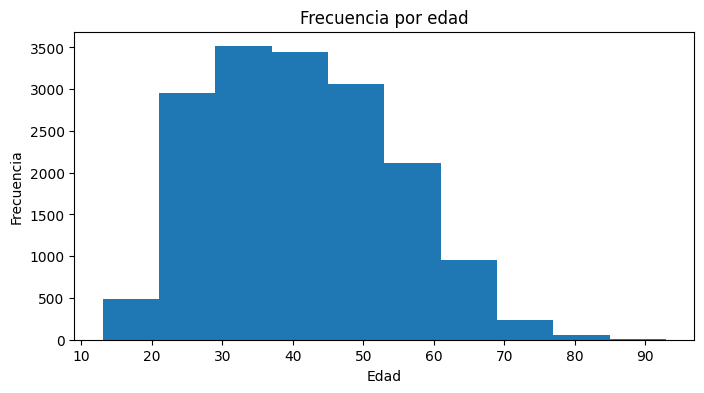

In [157]:
fig, ax= plt.subplots(figsize=(8,4))
ax.hist(df.age, bins=10)
ax.set_ylabel('Frecuencia')
ax.set_xlabel('Edad')
ax.set_title('Frecuencia por edad')

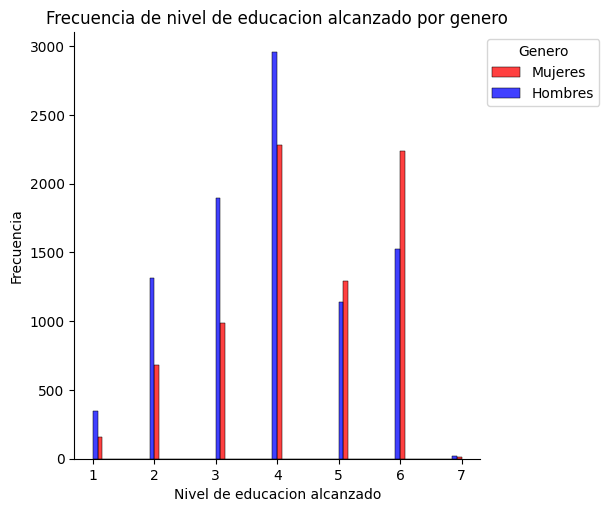

In [167]:
sns.displot(data= df, x='ed_lvl', hue='gender', multiple='dodge', palette=['blue', 'red'], legend=False )
plt.title('Frecuencia de nivel de educacion alcanzado por genero')
plt.xlabel('Nivel de educacion alcanzado')
plt.ylabel('Frecuencia')
plt.legend(title='Genero', labels=['Mujeres', 'Hombres'], loc='upper left', bbox_to_anchor=(1, 1))


(0.0, 900000.0)

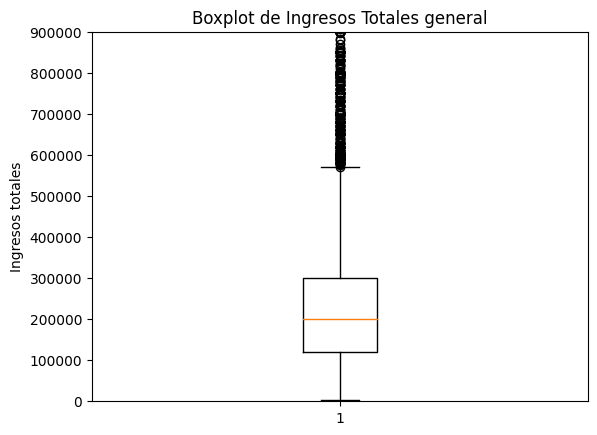

In [43]:
fig, ax = plt.subplots()
ax.boxplot(df.tot_income)
ax.set_ylabel('Ingresos totales')
ax.set_title('Boxplot de Ingresos Totales general')
plt.ylim(0, 900000)


(0.0, 900000.0)

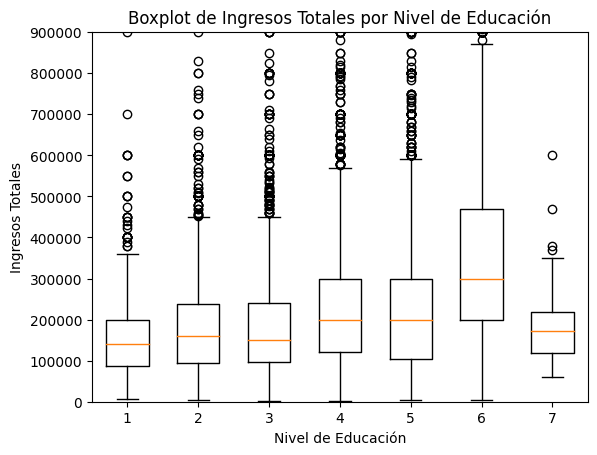

In [42]:
data = [df['tot_income'][df['ed_lvl'] == i] for i in df['ed_lvl'].unique()]
fig, ax = plt.subplots()
ax.boxplot(data, positions=df['ed_lvl'].unique(), widths=0.6)
ax.set_xlabel('Nivel de Educación')
ax.set_ylabel('Ingresos Totales')
ax.set_title('Boxplot de Ingresos Totales por Nivel de Educación')
plt.ylim(0, 900000)

(0.0, 900000.0)

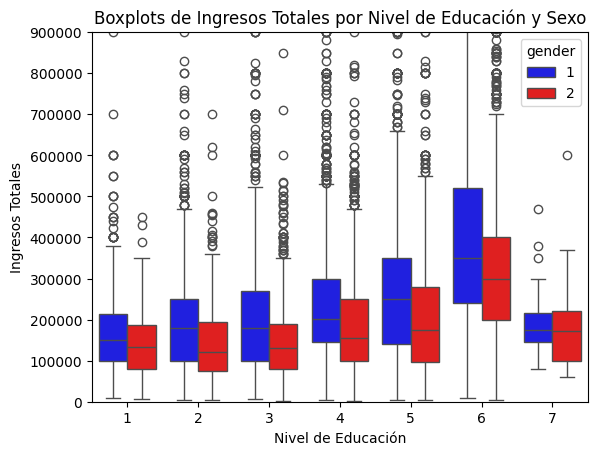

In [198]:
sns.boxplot(x='ed_lvl', y='tot_income', hue='gender', data=df, palette=['Blue', 'Red'])
plt.xlabel('Nivel de Educación')
plt.ylabel('Ingresos Totales')
plt.title('Boxplots de Ingresos Totales por Nivel de Educación y Sexo')
# plt.legend(title='Genero', labels=['Hombres', 'Mujeres'], loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(0, 900000)

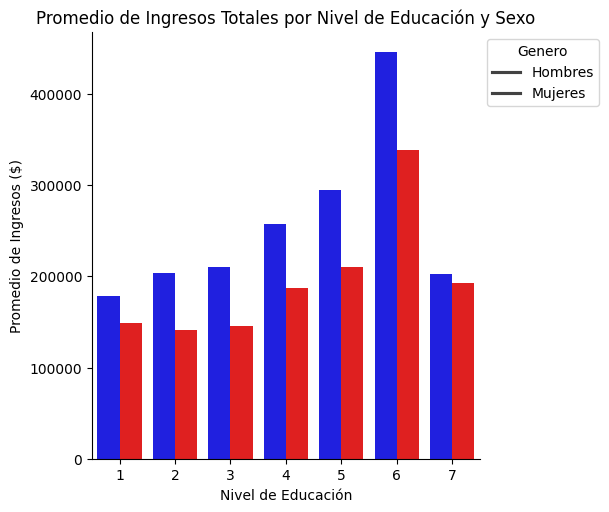

In [200]:
promedio = df.groupby(['ed_lvl', 'gender'])['tot_income'].mean().reset_index()
sns.catplot(x='ed_lvl', y='tot_income', hue='gender', data=promedio, kind='bar', palette=['blue', 'red'], legend=False)
plt.xlabel('Nivel de Educación')
plt.ylabel('Promedio de Ingresos ($)')
plt.title('Promedio de Ingresos Totales por Nivel de Educación y Sexo')
plt.legend(title='Genero', labels=['Hombres', 'Mujeres'], loc='upper left', bbox_to_anchor=(1, 1))

En los dos ultimos graficos puede observarse la diferencia en los promedios de ingresos segun el genero que se repite en todos los niveles de educacion.

(0.0, 900000.0)

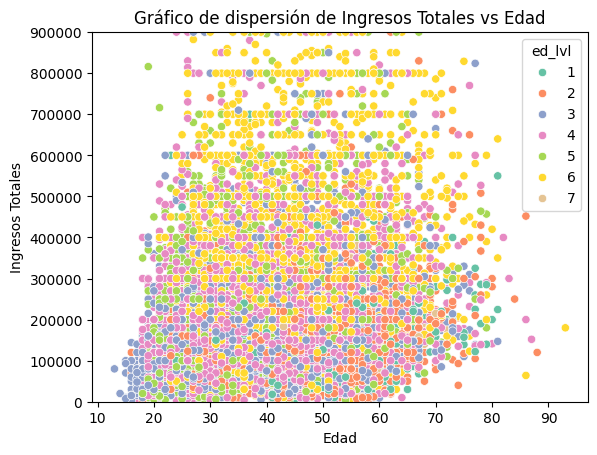

In [155]:
sns.scatterplot(x='age', y='tot_income', hue='ed_lvl', data=df, palette='Set2')
plt.xlabel('Edad')
plt.title('Gráfico de dispersión de Ingresos Totales vs Edad')
plt.ylabel('Ingresos Totales')
plt.ylim(0, 900000)

No se puede determinar claramente una correlacion entre el nivel de educacion, la edad y los ingresos

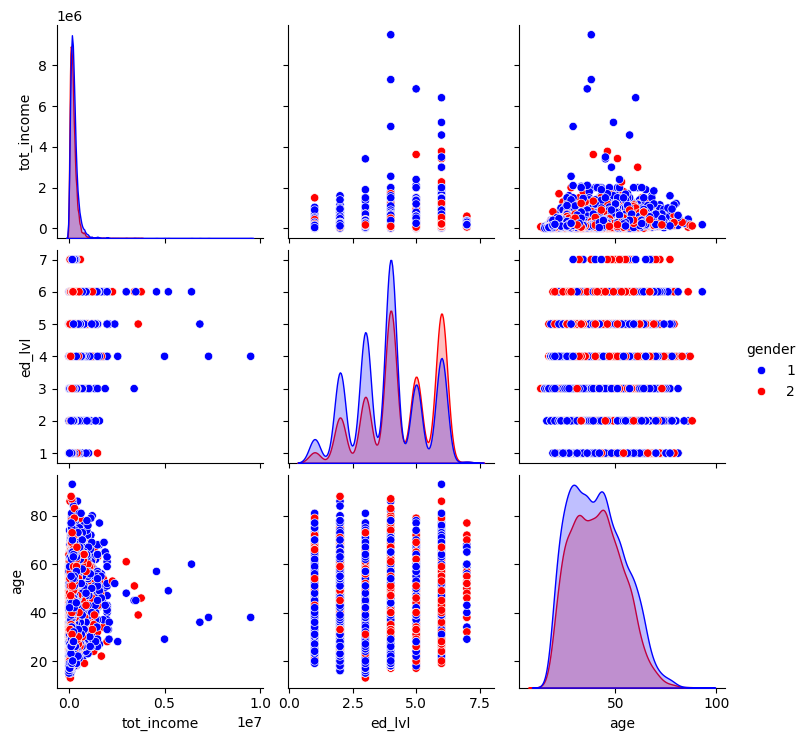

In [97]:
g=sns.pairplot(df, vars=['tot_income', 'ed_lvl', 'age'], hue='gender', palette=['blue', 'red'])